In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
df.shape

(284807, 31)

In [55]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [56]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

Data is highly imbalanced.Around 0.17% are fraud cases in this data.Hence,prediction will not be accurate.

We'll use SMOTE for data balancing.

In [57]:
from imblearn.over_sampling import SMOTE
#Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority',random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Class',axis=1),df['Class'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)],axis=1)

In [58]:
oversampled['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

Data is oversampled.Next step is to splkt the dataset into train-test

In [59]:
from sklearn.model_selection import train_test_split
X = oversampled.drop(['Class'],axis=1)
y = oversampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)

Feature Scaling required only for amount.Rest is scaled already

In [60]:
#Scaling the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [61]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
28447,35016.000000,0.655598,-2.023127,-0.473715,-0.605063,-1.048013,0.003242,-0.218741,-0.156654,-0.478045,...,0.969345,0.518153,0.432995,-0.690983,-0.952536,0.573506,0.016336,-0.072004,0.077913,1.620824
493667,41275.938631,-11.964702,6.392079,-13.172549,7.959041,-10.849051,-2.797546,-12.974921,7.452028,-7.606670,...,-0.913319,2.267172,-0.971726,-0.231624,0.617575,0.294375,-0.280388,-0.724994,-0.746009,0.204420
363558,112486.425770,-1.266549,-0.656722,-1.243935,3.919516,0.082808,-0.128698,0.238020,-0.589664,-0.482604,...,0.096460,0.035061,0.250217,0.253087,0.571346,-0.463323,0.081410,0.030572,-0.554676,1.435272
217453,140894.000000,2.166772,-0.518305,-1.231390,-0.291323,-0.459410,-1.083303,-0.179789,-0.436250,-0.451792,...,-0.559318,-0.043483,0.603334,-0.009257,-0.068698,0.274296,-0.016204,0.019198,-0.051562,-0.384247
93673,64538.000000,1.287888,-0.338171,-0.853423,-1.068883,1.662317,3.342280,-0.841614,0.871857,0.247240,...,0.097036,-0.237722,-0.882660,0.105775,1.037183,0.164507,0.802175,-0.062745,0.010789,-0.344226


In [62]:
X_test['Amount'] = scaler.fit_transform(X_test[['Amount']])

Data is scaled successfully.Next step is to setup models:

In [63]:
# Importing the metrics to measure performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [64]:
#To save the score in the table
results = pd.DataFrame(columns=['Model','Accuracy', 'F1 Score', 'ROC'])

In [65]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [66]:
# Prepare results function
def display_test_results(model_name, model):

  #Prediction on the test set
  y_test_pred = model.predict(X_test)

  # Confusion matrix
  print("---------------Confusion Matrix--------------")
  c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
  print(c_matrix)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
  cm_display.plot(cmap=plt.cm.Blues)
  plt.show()

  #clasification_report
  print("-------------Classificationn_report---------")
  print(classification_report(y_test, y_test_pred))
  print("-------------More Specific classification_report----------")
  TP = c_matrix[1,1] #True positive
  TN = c_matrix[0,0] # true negatives
  FP = c_matrix[0,1] # false positive
  FN = c_matrix[1,0] # false negatives

  #Accuracy
  print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

  #Sensitivity
  print("Sensitivity:-",TP/float(TP+FN))

  #Specificity
  print("Specificity:-",TN/float(TN+FP))

  #F1 score
  print("F1-Score:-",f1_score(y_test, y_test_pred))

  #Predicted probability
  y_test_pred_proba = model.predict_proba(X_test)[:,1]

  # roc_auc
  print("---------------------ROC-------------------")
  roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

  #plot the ROC curve
  draw_roc(y_test, y_test_pred_proba)

  #add all metrics score in final result store
  results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test,y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

  return None


**Logistic Regression**

In [67]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=0.01)
logistic_model = logistic.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---------------Confusion Matrix--------------
[[55622   958]
 [ 2032 55114]]


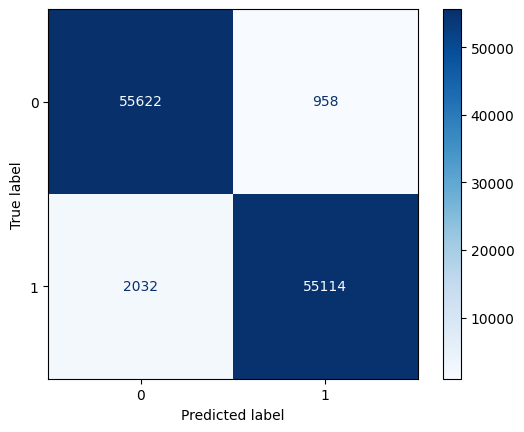

-------------Classificationn_report---------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56580
           1       0.98      0.96      0.97     57146

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

-------------More Specific classification_report----------
Accuracy:- 0.9737087385470341
Sensitivity:- 0.964441955692437
Specificity:- 0.9830682219865677
F1-Score:- 0.9735907717854051
---------------------ROC-------------------


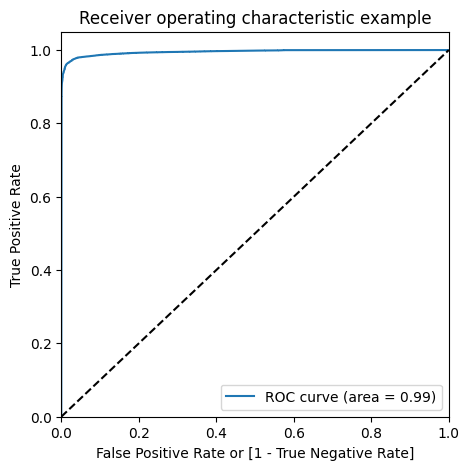

In [68]:
display_test_results("Logistic Regression", logistic_model)

**XGboost**

In [69]:
from xgboost import XGBClassifier
params = {'learning_rate':0.2,
          'max_depth':2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistics'}

In [70]:
xgb_model = XGBClassifier(params = params)
xgb_model.fit(X_train,y_train)

[14:09:38] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistics', 'subsample': 0.9},
              predictor=None, ...)

---------------Confusion Matrix--------------
[[56560    20]
 [    0 57146]]


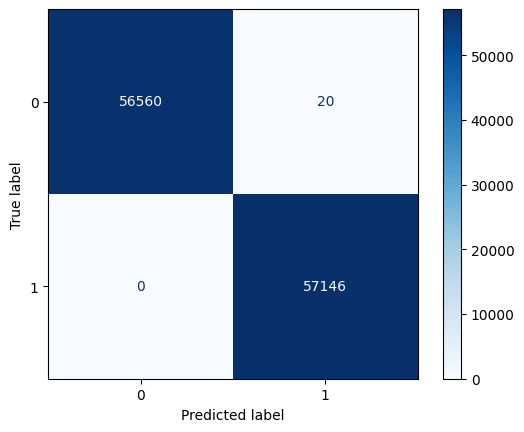

-------------Classificationn_report---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56580
           1       1.00      1.00      1.00     57146

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

-------------More Specific classification_report----------
Accuracy:- 0.9998241387193781
Sensitivity:- 1.0
Specificity:- 0.9996465182043125
F1-Score:- 0.9998250402407446
---------------------ROC-------------------


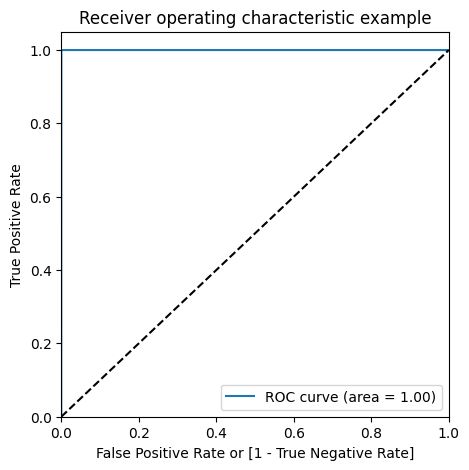

In [71]:
display_test_results("XG Boost", xgb_model)

**Decision Tree**

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
decision_tree_model = DecisionTreeClassifier(criterion = "gini",
                                             random_state=100,
                                             max_depth=5,
                                             min_samples_leaf=100,
                                             min_samples_split=100)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

---------------Confusion Matrix--------------
[[55491  1089]
 [ 2331 54815]]


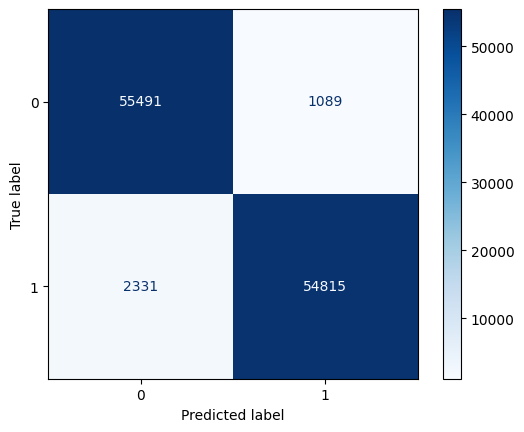

-------------Classificationn_report---------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56580
           1       0.98      0.96      0.97     57146

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

-------------More Specific classification_report----------
Accuracy:- 0.9699277210136644
Sensitivity:- 0.9592097434641095
Specificity:- 0.9807529162248144
F1-Score:- 0.969747899159664
---------------------ROC-------------------


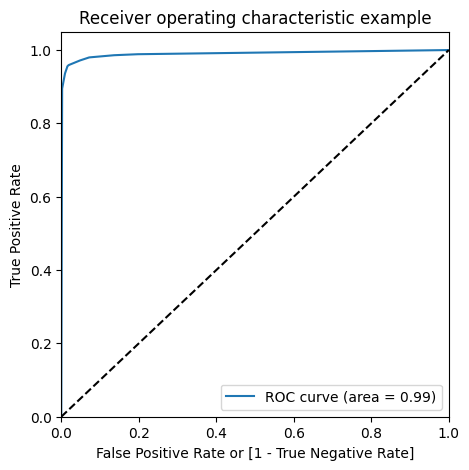

In [74]:
display_test_results("Decision Tree",decision_tree_model)

**Random Forest Classifier**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
random_forest_model = RandomForestClassifier(bootstrap=True,
                                             max_depth=5,
                                             min_samples_leaf=50,
                                             min_samples_split=50,
                                             max_features=10,
                                             n_estimators=100)

---------------Confusion Matrix--------------
[[56197   383]
 [ 2831 54315]]


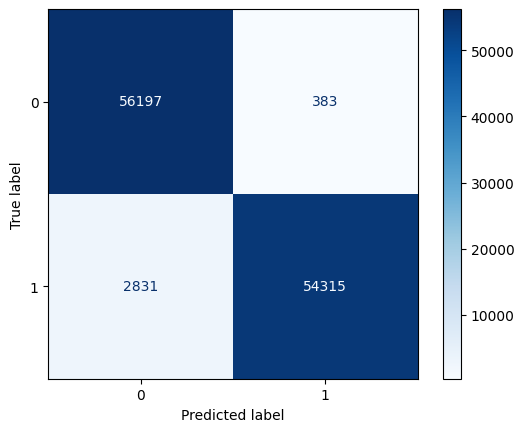

-------------Classificationn_report---------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56580
           1       0.99      0.95      0.97     57146

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

-------------More Specific classification_report----------
Accuracy:- 0.9717390922040694
Sensitivity:- 0.9504602246876421
Specificity:- 0.993230823612584
F1-Score:- 0.9712635456528736
---------------------ROC-------------------


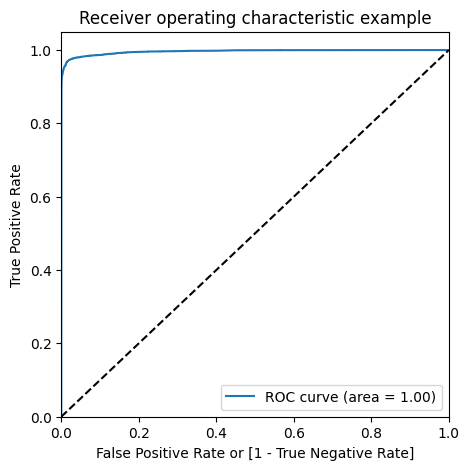

In [77]:
random_forest_model.fit(X_train,y_train)
display_test_results("Random Forest",random_forest_model)

**Let's Summarize the results:**

In [78]:
results.sort_values(by="ROC", ascending=False)

,Model,Accuracy,F1 Score,ROC
1,XG Boost,0.999824,0.999825,0.999990
3,Random Forest,0.971739,0.971264,0.995914
0,Logistic Regression,0.973709,0.973591,0.994858
2,Decision Tree,0.969928,0.969748,0.989670
